# ------------------------------------Recommender System--------------------------------------


# #############################################################

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_excel(r'F:\Project\final_final\Final data.xlsx')

In [3]:
df=df1

In [4]:
df.head()

,What is your name?,What is your gender?,What was your course in UG?,What is your UG specialization? Major Subject (Eg; Mathematics),What are your interests?,What are your skills ? (Select multiple if necessary),What was the average CGPA or Percentage obtained in under graduation?,Did you do any certification courses additionally?,"If yes, please specify your certificate course title.",Are you working?,"If yes, then what is/was your first Job title in your current field of work? If not applicable, write NA.","Have you done masters after undergraduation? If yes, mention your field of masters.(Eg; Masters in Mathematics)"
0,A.Uha Priya,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,85,Yes,"Linux,Git",Yes,Software,MCA
1,Aadil,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",66.5,Yes,Microsoft certification,Yes,Computer Software Engineer,NaN
2,Aakriti,Female,BA,Psychology,Understand human behaviour,People management;Communication skills,64.6,Yes,Resilience psychology,No,NaN,NaN
3,Aanchal sharma,Female,MBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,75.525,No,No,Yes,Relationships manager,NaN
4,Aangkeeta Sarkar,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,70.68,Yes,Extreme Productivity (Blinkist Summary),Yes,Plant Instrumentation Engineer,NaN


In [5]:
df.columns

Index(['What is your name?', 'What is your gender?',
       'What was your course in UG?',
       'What is your UG specialization? Major Subject (Eg; Mathematics)',
       'What are your interests?',
       'What are your skills ? (Select multiple if necessary)',
       'What was the average CGPA or Percentage obtained in under graduation?',
       'Did you do any certification courses additionally?',
       'If yes, please specify your certificate course title.',
       'Are you working?',
       'If yes, then what is/was your first Job title in your current field of work? If not applicable, write NA.               ',
       'Have you done masters after undergraduation? If yes, mention your field of masters.(Eg; Masters in Mathematics)'],
      dtype='object')

In [6]:
df.columns=['nm','gr','ug','ugsp','irt','ski','cgp','cert','certc','wrk','job','mas']

In [7]:
df.head()

,nm,gr,ug,ugsp,irt,ski,cgp,cert,certc,wrk,job,mas
0,A.Uha Priya,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,85,Yes,"Linux,Git",Yes,Software,MCA
1,Aadil,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",66.5,Yes,Microsoft certification,Yes,Computer Software Engineer,NaN
2,Aakriti,Female,BA,Psychology,Understand human behaviour,People management;Communication skills,64.6,Yes,Resilience psychology,No,NaN,NaN
3,Aanchal sharma,Female,MBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,75.525,No,No,Yes,Relationships manager,NaN
4,Aangkeeta Sarkar,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,70.68,Yes,Extreme Productivity (Blinkist Summary),Yes,Plant Instrumentation Engineer,NaN


# EDA 

# EDA by pandas profiling

In [ ]:
from pandas_profiling import ProfileReport
pf=ProfileReport(df)

In [ ]:
pf

In [8]:
df.describe()

,nm,gr,ug,ugsp,irt,ski,cgp,cert,certc,wrk,job,mas
count,1195,1195,1195,1195,1195,1194,1195,1195,1195,1195,899,469
unique,1161,3,59,295,615,1007,301,3,524,2,483,236
top,Abhishek,Male,B.Tech,Computer Science Engineering,Technology,NO,76,Yes,No,Yes,Student (Unemployed),Masters in Business Administration
freq,3,806,488,174,132,44,56,611,580,713,116,42


In [9]:
 df.isnull().sum()

nm         0
gr         0
ug         0
ugsp       0
irt        0
ski        1
cgp        0
cert       0
certc      0
wrk        0
job      296
mas      726
dtype: int64

In [10]:
df.fillna('', inplace=True)

# EDA,Univariate Analysis and Data Preprocessing

In [11]:
#since the name is not a variable for model building, we can delete.
del df['nm']

In [12]:
df.gr

0       Female
1         Male
2       Female
3       Female
4       Female
         ...  
1190      Male
1191      Male
1192      Male
1193      Male
1194      Male
Name: gr, Length: 1195, dtype: object

In [13]:
df.gr.unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [14]:
df.ug.unique()

array(['B.Sc', 'B.E', 'BA', 'MBA', 'B.Tech', 'BMS', 'B.Com', 'BE', 'BCA',
       'M.Tech', 'BBA', 'B.Pharmacy', 'Bca', 'Diploma', 'Law Hons  ',
       'Law Hons', 'Biotechnology', 'B.M.S', 'BALLB', 'MCA',
       'Bachelor of Management Studies', 'Diploma in pharmacy\xa0',
       'Bachelor of journalism', 'Doctor ', 'B.A.F', 'M.A',
       'Master of journalism', 'M.Sc', 'Master of journalism ',
       'Pharmacy', 'D ed', 'Hh', 'BBA\xa0', 'B.E.', 'B.E\xa0', 'Poo.sc',
       'Chartered Accountancy', 'B.Com\xa0', 'B.Pharm', 'MA', 'BE\xa0',
       'M.Com', 'B.E.\xa0', 'Commercial Art Visual art', 'BCA\xa0',
       'B.Arch', 'MDCS', 'Bhmct', 'Arts', 'Hsc', 'TYB.COM', 'Degree',
       'G. N. M Nurshing', 'Economics ', 'BAC', 'Journalism ',
       'Agri diploma', 'DME', 'PGDM'], dtype=object)

<AxesSubplot: >

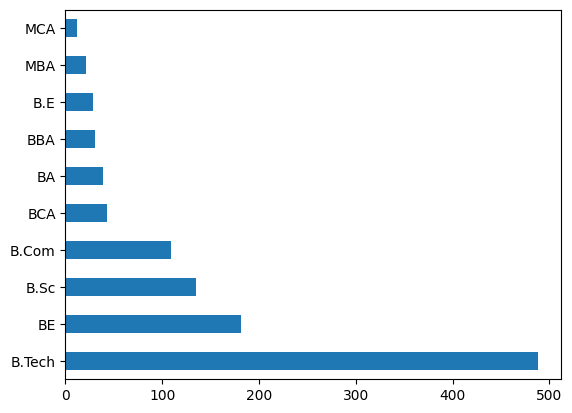

In [15]:
df['ug'].value_counts()[:10].plot(kind='barh')

In [16]:
i=0
while 1195 >i:
 m_to_b=df.ug[i]
 if m_to_b.startswith('M') ==True:
       df.ug[i] = m_to_b.replace(m_to_b[0], 'B')
        
 i=i+1    

In [17]:
df

,gr,ug,ugsp,irt,ski,cgp,cert,certc,wrk,job,mas
0,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,85,Yes,"Linux,Git",Yes,Software,MCA
1,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",66.5,Yes,Microsoft certification,Yes,Computer Software Engineer,
2,Female,BA,Psychology,Understand human behaviour,People management;Communication skills,64.6,Yes,Resilience psychology,No,,
3,Female,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,75.525,No,No,Yes,Relationships manager,
4,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,70.68,Yes,Extreme Productivity (Blinkist Summary),Yes,Plant Instrumentation Engineer,
...,...,...,...,...,...,...,...,...,...,...,...
1190,Male,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",72.2,No,AWS cloud practitioner,Yes,Data Engineer,Masters in Computer Science
1191,Male,B.Sc,Computer Science Engineering,Technology,"SQL, Problem Solving skills",80.75,No,No,No,Nothing,Masters in Computer Science
1192,Male,B.Tech,Animation & Visual Effects,Technology;Content Writing,Programming Language skills;Critical Thinking;...,59.22,Yes,"Sql, Python,tableau,data science",Yes,Hr Assistant II,
1193,Male,BE,Computer Science,"Financial Analysis, Technology","AI, Java, SQL, C++, R, Linux",57,No,No,No,Student (Unemployed),Masters in Computer Applications


In [18]:
df.ug.unique()

array(['B.Sc', 'B.E', 'BA', 'BBA', 'B.Tech', 'BMS', 'B.Com', 'BE', 'BCA',
       'B.Pharmacy', 'Bca', 'Diploma', 'Law Hons  ', 'Law Hons',
       'Biotechnology', 'B.M.S', 'BALLB',
       'Bachelor of Management Studies', 'Diploma in pharmacy\xa0',
       'Bachelor of journalism', 'Doctor ', 'B.A.F', 'B.A',
       'Baster of journalism', 'Baster of journalism ', 'Pharmacy',
       'D ed', 'Hh', 'BBA\xa0', 'B.E.', 'B.E\xa0', 'Poo.sc',
       'Chartered Accountancy', 'B.Com\xa0', 'B.Pharm', 'BE\xa0',
       'B.E.\xa0', 'Commercial Art Visual art', 'BCA\xa0', 'B.Arch',
       'BDCS', 'Bhmct', 'Arts', 'Hsc', 'TYB.COM', 'Degree',
       'G. N. M Nurshing', 'Economics ', 'BAC', 'Journalism ',
       'Agri diploma', 'DME', 'PGDM'], dtype=object)

In [19]:
df.ugsp.unique()

array(['Computer Applications', 'Computer Science Engineering',
       'Psychology', 'Commerce', 'Instrumentation Engineering',
       'Physics ', 'Accountancy', 'Automobile Engineering', 'Marketing ',
       'Automation', 'Science,Maths, Engineering subject',
       'Mechanical Engineering', 'Electrical and Electronics Engineering',
       'Structural Engineeeing ', 'Mining', 'Accountancy ', 'C language',
       'C,c++, java', 'Civil Engineering', 'Management',
       'Electronics and Communication Engineering', 'Sales and marketing',
       'Economics', 'Computer science and business system', 'Pharmacy',
       'Interior design', 'Information Technology', 'Chemistry',
       'Commerce ', 'Physics', 'Statistics ', 'Information TechNAlogy',
       'Industrial Engineering ', 'High pressure die casting ',
       'Accounting&Finance', 'Computer Science Engineering ',
       'Computer Science ', 'Mathematics',
       'Accounting(business and management) ', 'Sales and Marketing',
       'Co

In [20]:
df.loc[df['ugsp'] == 'C,c++, java', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] == 'Science,Maths, Engineering subject', 'ugsp'] = 'Engineering'
df.loc[df['ugsp'] == 'Structural Engineeeing', 'ugsp'] = 'civil engineering'
df.loc[df['ugsp'] ==  'High pressure die casting ', 'ugsp'] = 'Mechanical engineering'

df.loc[df['ugsp'] == 'Electrical Machines', 'ugsp'] = 'celectrical Engineering'
df.loc[df['ugsp'] == 'ManagementÃŠ', 'ugsp'] = 'Management'
df.loc[df['ugsp'] == 'Principal of programming language with C, MS Office Management Tools, Computer Organization, Mathematics, English.', 'ugsp'] = 'computer science engineering'
df.loc[df['ugsp'] == 'Electronics & Telecom.', 'ugsp'] = 'Electrical and Electronics engineering'

df.loc[df['ugsp'] == 'Mechanical ', 'ugsp'] = 'Mechanical Engineering'
df.loc[df['ugsp'] == 'Structural analysis ', 'ugsp'] = 'civil Engineering'
df.loc[df['ugsp'] == 'Transportation Engineering', 'ugsp'] = 'civil engineering'
df.loc[df['ugsp'] =='B.E complete', 'ugsp'] = 'engineering'

df.loc[df['ugsp'] =='Computer ( Languages like  .. C, C++ ,  Java,  C# ) ', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] =='Java Programming & Website Designing' , 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] == 'Programing language', 'ugsp'] = 'computer science engineering'
df.loc[df['ugsp'] == 'C, C++, Java, SQL, MySQL, Unix, HTML, Mathematics, Statistics', 'ugsp'] = 'computer science engineering'

df.loc[df['ugsp'] == 'Cse', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] == 'Building material and construction ', 'ugsp'] = 'civil Engineering'
df.loc[df['ugsp'] == 'MathematicsÃŠ', 'ugsp'] = 'mathematics'
df.loc[df['ugsp'] == 'CSIT', 'ugsp'] = 'computer science engineering'

df.loc[df['ugsp'] ==  'Java ', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] == 'Engineering graphics', 'ugsp'] = 'civil Engineering'
df.loc[df['ugsp'] == 'B.E.\xa0', 'ugsp'] = 'engineering'
df.loc[df['ugsp'] == 'Oops', 'ugsp'] = 'computer science engineering'

df.loc[df['ugsp'] ==   'NAthing ', 'ugsp'] = 'na'
df.loc[df['ugsp'] == 'Graphics', 'ugsp'] = 'civil Engineering'
df.loc[df['ugsp'] ==  'C, C++, java, SQL, MYSql, Unix, Html, Mathematics, Statistics', 'ugsp'] = 'computer science engineering'
df.loc[df['ugsp'] ==  'Coding', 'ugsp'] = 'computer science engineering'

df.loc[df['ugsp'] ==  'C language', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] =='C++', 'ugsp'] = 'computer science Engineering'
df.loc[df['ugsp'] == 'Coding ', 'ugsp'] = 'computer science engineering'
df.loc[df['ugsp'] == 'Java', 'ugsp'] = 'computer science engineering'

df.loc[df['ugsp'] ==   'Structure ', 'ugsp'] = 'civil Engineering'
df.loc[df['ugsp'] == 'Mechanical Machines ', 'ugsp'] = 'mechanical Engineering'
df.loc[df['ugsp'] == 'Software engineering, java programming, web development ', 'ugsp'] = 'computer science engineering'
df.loc[df['ugsp'] == 'Mechania', 'ugsp'] = 'mechanical engineering'


In [21]:
df.ugsp.unique()

array(['Computer Applications', 'Computer Science Engineering',
       'Psychology', 'Commerce', 'Instrumentation Engineering',
       'Physics ', 'Accountancy', 'Automobile Engineering', 'Marketing ',
       'Automation', 'Engineering', 'Mechanical Engineering',
       'Electrical and Electronics Engineering',
       'Structural Engineeeing ', 'Mining', 'Accountancy ',
       'computer science Engineering', 'Civil Engineering', 'Management',
       'Electronics and Communication Engineering', 'Sales and marketing',
       'Economics', 'Computer science and business system', 'Pharmacy',
       'Interior design', 'Information Technology', 'Chemistry',
       'Commerce ', 'Physics', 'Statistics ', 'Information TechNAlogy',
       'Industrial Engineering ', 'Mechanical engineering',
       'Accounting&Finance', 'Computer Science Engineering ',
       'Computer Science ', 'Mathematics',
       'Accounting(business and management) ', 'Sales and Marketing',
       'Computer science ', 'Civil

In [22]:
bool_series = pd.isnull(df["ugsp"]) 

In [23]:
bool_series.sum()

0

<AxesSubplot: >

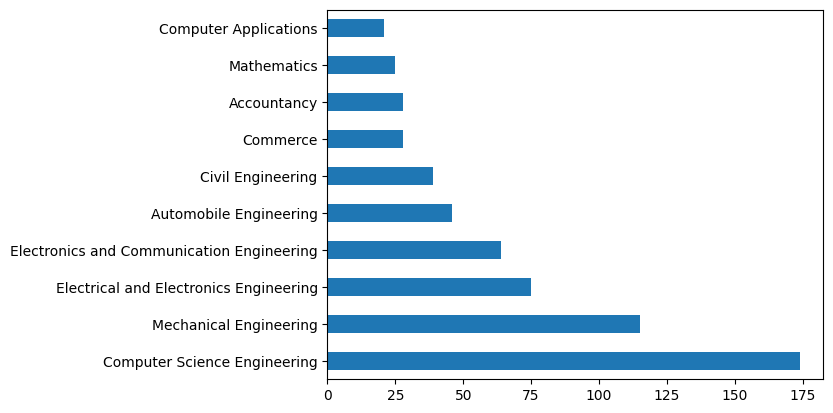

In [24]:
df['ugsp'].value_counts()[:10].plot(kind='barh')


In [25]:
#both are categorical variable, so we can do tfidf 

In [26]:
#df['cgp'].mean()

In [27]:
for i in df['cgp']:
    if type(i)== str:
        print(i)
    else: continue

58 


In [28]:
df.cgp = df.cgp.astype('int64')

In [29]:
mean=df['cgp'].mean()

In [30]:
mean

71.24937238493723

In [31]:
df.loc[(df['cgp'] >100 ),'cgp']=mean

In [32]:
df.loc[(df['cgp'] <35 )& (df['cgp'] >10 ),'cgp']=mean

In [33]:
df.loc[(df['cgp'] <10 ),'cgp']=df['cgp']*100

In [34]:
df.loc[(df['cgp'] == 0 ),'cgp']=35

In [35]:
EDA ={"column_name ": "Percentage",
      "mean": df.cgp.mean(),
      "median":df.cgp.median(),
      "mode":df.cgp.mode(),
      "standard deviation": df.cgp.std(),
      "variance":df.cgp.var(),
      "skewness":df.cgp.skew(),
      "kurtosis":df.cgp.kurt()}

pd.DataFrame([EDA])


,column_name,mean,median,mode,standard deviation,variance,skewness,kurtosis
0,Percentage,71.346861,71.0,"0 76.0 Name: cgp, dtype: float64",9.034011,81.613359,-0.178892,0.239494


In [36]:
import tkinter
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.use('TkAgg')
import numpy as np
import seaborn as sns

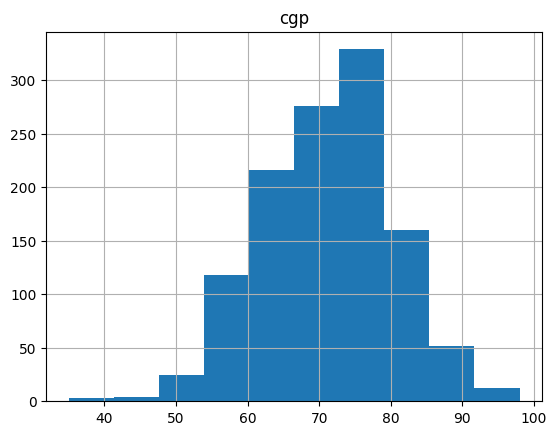

In [37]:
hist = df.hist()
plt.show()

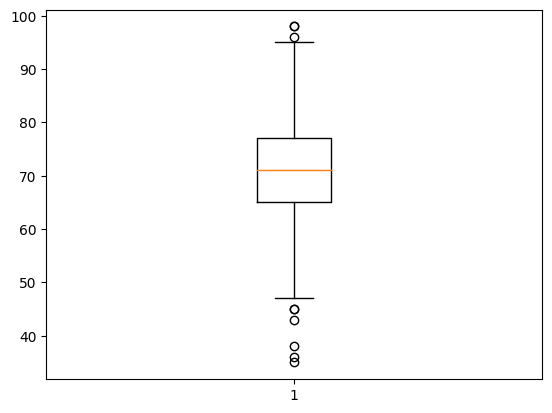

In [38]:
# box plot
plt.boxplot(df.cgp)
plt.show()

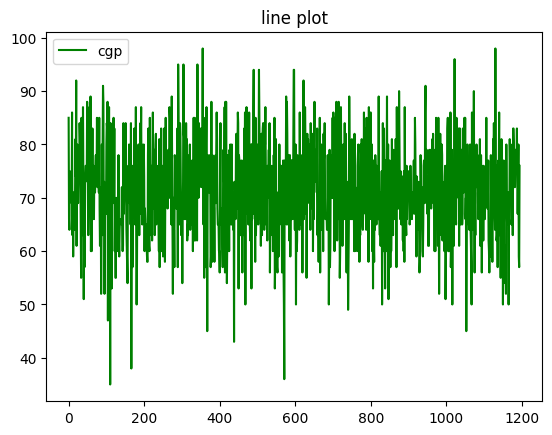

In [39]:
df.plot(kind='line',color='green',title='line plot')
plt.show()

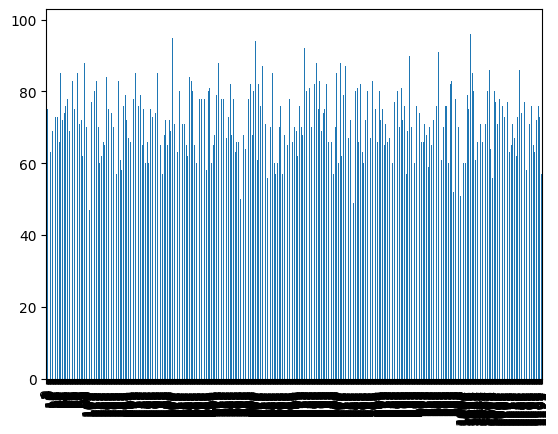

In [40]:
df.cgp.plot(kind='bar')
plt.show()

C:\Users\mma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


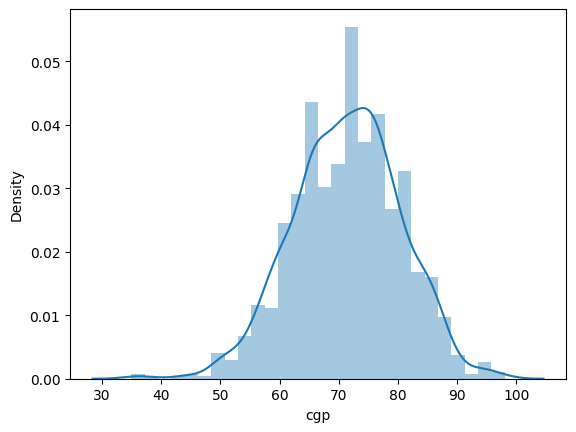

In [41]:
sns.distplot(df.cgp)
plt.show()

C:\Users\mma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


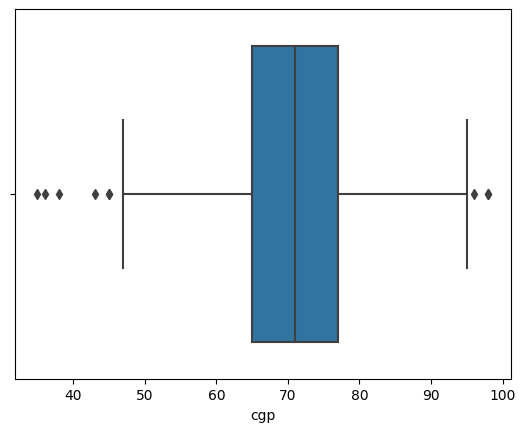

In [42]:
sns.boxplot(df.cgp)
plt.show()

In [43]:
# since it is marks, no requirmennt of doing outlier analysis

C:\Users\mma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


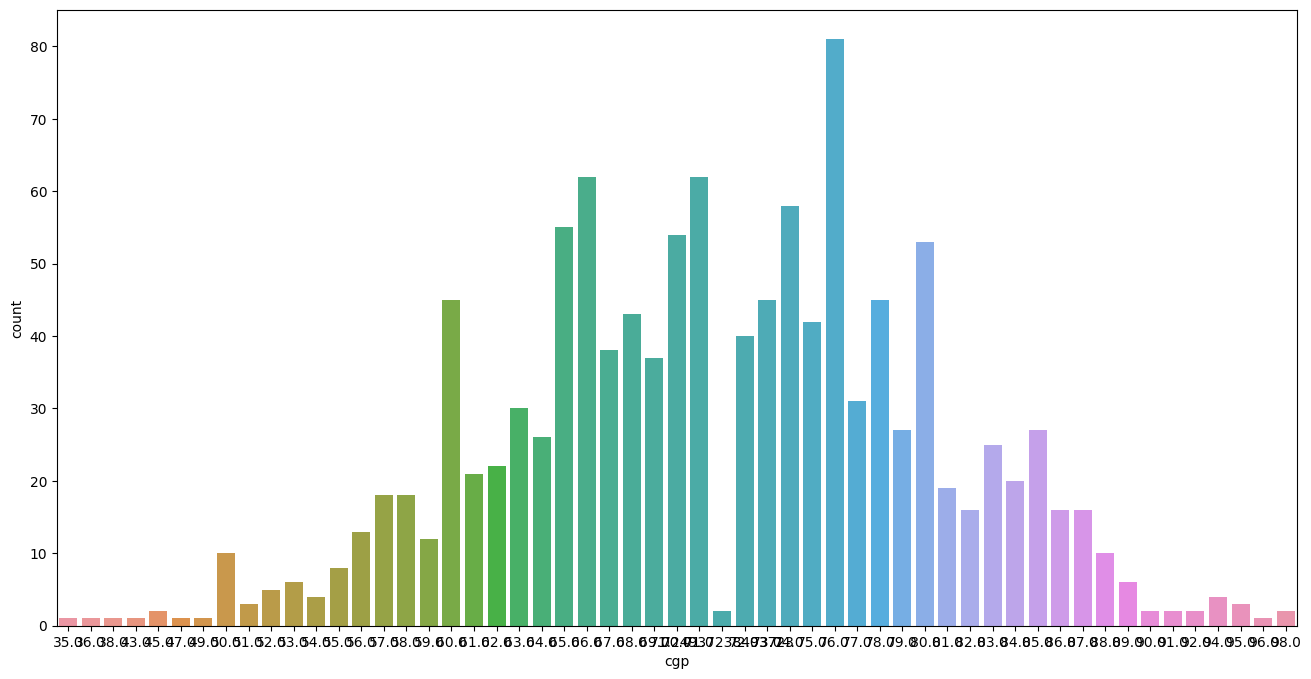

In [44]:
# Countplot
plt.figure(1, figsize=(16, 8))
sns.countplot(df['cgp'])
plt.show()

In [46]:
from statsmodels.graphics.gofplots import qqplot
from scipy import stats

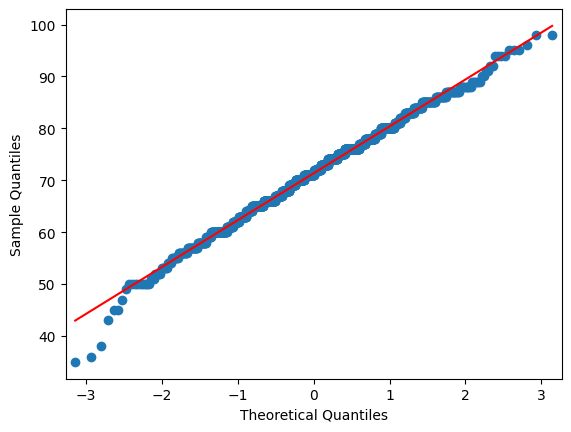

In [47]:
qqplot_data = qqplot(df.cgp, line='s').gca().lines
plt.show()

In [48]:
#"Are you working?" by this we can filter into working people and students.

In [49]:
df.wrk.unique()

array(['Yes', 'No'], dtype=object)

In [50]:
df.shape

(1195, 11)

In [51]:
df.columns

Index(['gr', 'ug', 'ugsp', 'irt', 'ski', 'cgp', 'cert', 'certc', 'wrk', 'job',
       'mas'],
      dtype='object')

In [52]:
df4=df.iloc[:,[1,2,3,4,9,10]] 

In [53]:
df3=df4.copy()

In [54]:
df3

,ug,ugsp,irt,ski,job,mas
0,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,Software,MCA
1,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",Computer Software Engineer,
2,BA,Psychology,Understand human behaviour,People management;Communication skills,,
3,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,Relationships manager,
4,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,Plant Instrumentation Engineer,
...,...,...,...,...,...,...
1190,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",Data Engineer,Masters in Computer Science
1191,B.Sc,Computer Science Engineering,Technology,"SQL, Problem Solving skills",Nothing,Masters in Computer Science
1192,B.Tech,Animation & Visual Effects,Technology;Content Writing,Programming Language skills;Critical Thinking;...,Hr Assistant II,
1193,BE,Computer Science,"Financial Analysis, Technology","AI, Java, SQL, C++, R, Linux",Student (Unemployed),Masters in Computer Applications


In [55]:
dfj=df.loc[df.wrk =='Yes'].iloc[:,[1,2,3,4,9]]

In [56]:
dfj

,ug,ugsp,irt,ski,job
0,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,Software
1,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",Computer Software Engineer
3,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,Relationships manager
4,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,Plant Instrumentation Engineer
5,B.Tech,Computer Science Engineering,Technology,"C,C++,HTML,Java",Network analyst
...,...,...,...,...,...
1188,B.Tech,Electrical and Electronics Engineering,Product Life cycle Management,\nProduct Management;User Experience (UX);Prod...,Product Specialist
1189,B.Sc,computer science engineering,Technology,Communication skills;Data Visualization skills...,MIS
1190,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",Data Engineer
1192,B.Tech,Animation & Visual Effects,Technology;Content Writing,Programming Language skills;Critical Thinking;...,Hr Assistant II


In [57]:
 dfj.isnull().sum()

ug      0
ugsp    0
irt     0
ski     0
job     0
dtype: int64

In [60]:
dfj.to_csv(r'df_job_data_set_for_imputy.csv')

In [61]:
dfj = pd.read_excel(r'df_job_data_set_for_impute_to.xlsx')

In [62]:
dfj.columns

Index(['Unnamed: 0', 'gr', 'ug', 'ugsp', 'irt', 'ski', 'cgp', 'cert', 'certc',
       'job'],
      dtype='object')

In [63]:
dfjcopy=dfj.iloc[:,[2,3,4,5,9]]

In [64]:
dfj.rename(columns = {'Unnamed: 0':'index'}, inplace = True)


In [65]:
dfj

,index,gr,ug,ugsp,irt,ski,cgp,cert,certc,job
0,0,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,0.793651,1,"Linux,Git",Software engineer
1,1,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",0.492063,1,Microsoft certificationÂ,Computer Software Engineer
2,3,Female,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,0.634921,0,No,Relationships manager
3,4,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,0.555556,1,Extreme Productivity (Blinkist Summary),Plant Instrumentation Engineer
4,5,Female,B.Tech,Computer Science Engineering,Technology,"C,C++,HTML,Java",0.603175,1,"C,C++,HTML,Java",Network analyst
...,...,...,...,...,...,...,...,...,...,...
708,1188,Male,B.Tech,Electrical and Electronics Engineering,Product Life cycle Management,\nProduct Management;User Experience (UX);Prod...,0.603175,1,\nProduct Management,Product Specialist
709,1189,Male,B.Sc,computer science engineering,Technology,Communication skills;Data Visualization skills...,0.507937,0,No,DATA SCIENTIST
710,1190,Male,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",0.587302,0,AWS cloud practitionerÂ,Data Engineer
711,1192,Male,B.Tech,Animation & Visual Effects,Technology;Content Writing,Programming Language skills;Critical Thinking;...,0.380952,1,"Sql, Python,tableau,data science",Hr Assistant II


In [66]:
dfj.set_index(['index'], inplace = True)


In [67]:
dfj

,gr,ug,ugsp,irt,ski,cgp,cert,certc,job
index,,,,,,,,,
0,Female,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,0.793651,1,"Linux,Git",Software engineer
1,Male,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",0.492063,1,Microsoft certificationÂ,Computer Software Engineer
3,Female,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,0.634921,0,No,Relationships manager
4,Female,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,0.555556,1,Extreme Productivity (Blinkist Summary),Plant Instrumentation Engineer
5,Female,B.Tech,Computer Science Engineering,Technology,"C,C++,HTML,Java",0.603175,1,"C,C++,HTML,Java",Network analyst
...,...,...,...,...,...,...,...,...,...
1188,Male,B.Tech,Electrical and Electronics Engineering,Product Life cycle Management,\nProduct Management;User Experience (UX);Prod...,0.603175,1,\nProduct Management,Product Specialist
1189,Male,B.Sc,computer science engineering,Technology,Communication skills;Data Visualization skills...,0.507937,0,No,DATA SCIENTIST
1190,Male,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",0.587302,0,AWS cloud practitionerÂ,Data Engineer


In [68]:
dfj=dfj.iloc[:,[1,2,3,4,8]]

In [69]:
dfj

,ug,ugsp,irt,ski,job
index,,,,,
0,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,Software engineer
1,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",Computer Software Engineer
3,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,Relationships manager
4,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,Plant Instrumentation Engineer
5,B.Tech,Computer Science Engineering,Technology,"C,C++,HTML,Java",Network analyst
...,...,...,...,...,...
1188,B.Tech,Electrical and Electronics Engineering,Product Life cycle Management,\nProduct Management;User Experience (UX);Prod...,Product Specialist
1189,B.Sc,computer science engineering,Technology,Communication skills;Data Visualization skills...,DATA SCIENTIST
1190,B.Tech,Electronics and Communication Engineering,Technology,"Python, SQL, Oracle",Data Engineer


In [70]:
dfm=df.loc[(df.wrk =='No') & (df['mas'] !="" )].iloc[:,[1,2,3,4,10]]

In [71]:
dfm.isnull().sum()

ug      0
ugsp    0
irt     0
ski     0
mas     0
dtype: int64

In [72]:
dfm.to_csv(r'df_mast_data_set_for_imputy.csv')

In [73]:
dfm=pd.read_csv(r"df_mast_data_set_for_imputy_to.csv", encoding= 'unicode_escape')

In [74]:
dfm.columns

Index(['Unnamed: 0', 'gr', 'ug', 'ugsp', 'irt', 'ski', 'cgp', 'cert', 'certc',
       'mas'],
      dtype='object')

In [75]:
dfmcopy=dfm.iloc[:,[2,3,4,5,9]]

In [76]:
dfmcopy

,ug,ugsp,irt,ski,mas
0,BMS,Commerce,"Research, Sales/Marketing","Critical Thinking, Analytic Thinking, Communic...",mcom
1,B.Sc,Physics,Research;Teaching;Technology;Understand human ...,Active Listening;Critical Thinking;Gathering I...,Msc Physics
2,B.Com,Accountancy,Financial Analysis,"Accounting Skills, Analytic Thinking, Cost Acc...",Pursuing Certified Management Accountant of Un...
3,BCA,Computer Applications,Technology,Communication skills;Writing skills;C++;Python...,Master of Computer Applications
4,B.Tech,Computer Science Engineering,Financial Analysis;Research;Data analytics;Dat...,Programming Language skills;Critical Thinking;...,Masters in Data science and computational inte...
...,...,...,...,...,...
209,B.Sc,Business Management,Technology,"AI, Python, Java, SQL, Programming, Communicat...",Masters in Computer Applications
210,BBA,Commerce,Financial Analysis;Research;Sales/Marketing;Te...,Accounting Skills;Gathering Information;Financ...,MBA
211,B.Com,Computer Science Engineering,Financial Analysis,"Accounting Skills, Active Listening, Critical ...",Masters in Business Administration
212,B.Sc,Computer Science Engineering,Technology,"SQL, Problem Solving skills",Masters in Computer Science


In [77]:
dfm.rename(columns = {'Unnamed: 0':'index'}, inplace = True)


In [78]:
dfm.set_index(['index'], inplace = True)


In [79]:
dfm=dfm.iloc[:,[1,2,3,4,8]]

In [80]:
dfm

,ug,ugsp,irt,ski,mas
index,,,,,
6,BMS,Commerce,"Research, Sales/Marketing","Critical Thinking, Analytic Thinking, Communic...",mcom
9,B.Sc,Physics,Research;Teaching;Technology;Understand human ...,Active Listening;Critical Thinking;Gathering I...,Msc Physics
10,B.Com,Accountancy,Financial Analysis,"Accounting Skills, Analytic Thinking, Cost Acc...",Pursuing Certified Management Accountant of Un...
14,BCA,Computer Applications,Technology,Communication skills;Writing skills;C++;Python...,Master of Computer Applications
16,B.Tech,Computer Science Engineering,Financial Analysis;Research;Data analytics;Dat...,Programming Language skills;Critical Thinking;...,Masters in Data science and computational inte...
...,...,...,...,...,...
1179,B.Sc,Business Management,Technology,"AI, Python, Java, SQL, Programming, Communicat...",Masters in Computer Applications
1185,BBA,Commerce,Financial Analysis;Research;Sales/Marketing;Te...,Accounting Skills;Gathering Information;Financ...,MBA
1187,B.Com,Computer Science Engineering,Financial Analysis,"Accounting Skills, Active Listening, Critical ...",Masters in Business Administration


In [81]:
dfs=df.loc[(df.wrk =='No') & (df.mas =="" )].iloc[:,[1,2,3,4]]

In [82]:
dfs

,ug,ugsp,irt,ski
2,BA,Psychology,Understand human behaviour,People management;Communication skills
13,BE,Automation,Data analytics,Critical Thinking;Gathering Information;Presen...
21,B.Tech,Computer Science Engineering,Financial Analysis;Research;Sales/Marketing;Te...,Business Knowledge;Analytical Skills;Product k...
24,BCA,computer science Engineering,Technology;Service,Programming Language skills;Communication skil...
38,B.Tech,Computer science and business system,Financial Analysis;Technology;Web Designing;We...,Accounting Skills;Programming Language skills;...
...,...,...,...,...
1173,B.Tech,Civil Engineering,Data analytics,Analytical Skills;Data Visualization skills( P...
1175,B.Tech,"Statistics,Mathematics,Computers",Financial Analysis;Govt. Job,Accounting Skills;Active Listening;Finance rel...
1180,B.Tech,Business Management,Financial Analysis;Technology,Programming Language skills;Communication skil...
1181,B.Com,Mechanical Engineering,Sales/Marketing;Sports Industry;Customer care,Business Knowledge


# ***************************##########################################################################################################################################################


# **********######################################################################################################################################################################

# Model Building

# The recommendation for new student Sigmoid_Similarity


In [83]:
d = {}

In [84]:
# iterating the columns
#for col in df.columns:
print("enter your details:  ")
nm=input("Enter the name:  ")
#d['gr']=input("Enter the gender:  ")
d['ug']=input("Enter the UG:  ")
d['ugsp']=input("Enter the UG specialization:  ")
d['irt']=input("Enter the interests:  ")
d['ski']=input("Enter the skills :  ")
#d['cgp']=float(input("Enter the cgpa/percentage:  "))
#d['cert']=input("Did you do any certification courses additionally? :  ")
#d['certc']=input("If yes, please specify your certificate course title:  ")
d['wrk']='No'
d['job']=" "
d['mas']=" "  
    

enter your details:  
Enter the name:  Amer
Enter the UG:  btech
Enter the UG specialization:  Mechanical Engeneering
Enter the interests:  python
Enter the skills :  python


In [85]:
which=str(input("Would you be interested in a job or higher education?(if job plz input 'j' or if higher education, plz input 'h'):"))
if str(which)=='j' or str(which)=='J':
    topN=int(input("Enter the No.of Jobs to be recommended:  "))
else:
    topN=int(input("Enter the No.of Higher studies to be recommended:  "))

Would you be interested in a job or higher education?(if job plz input 'j' or if higher education, plz input 'h'):j
Enter the No.of Jobs to be recommended:  10


In [86]:
d

{'ug': 'btech',
 'ugsp': 'Mechanical Engeneering',
 'irt': 'python',
 'ski': 'python',
 'wrk': 'No',
 'job': ' ',
 'mas': ' '}

In [87]:
df3 = df3.append(d,ignore_index = True)

C:\Users\mma\AppData\Local\Temp\ipykernel_10412\2991027689.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df3.append(d,ignore_index = True)


In [88]:
df3.tail(3)

,ug,ugsp,irt,ski,job,mas,wrk
1193,BE,Computer Science,"Financial Analysis, Technology","AI, Java, SQL, C++, R, Linux",Student (Unemployed),Masters in Computer Applications,NaN
1194,B.Sc,Animation & Visual Effects,Animation,2D/3D Animation,VFX Production Assistant,,NaN
1195,btech,Mechanical Engeneering,python,python,,,No


In [89]:
df3.head()

,ug,ugsp,irt,ski,job,mas,wrk
0,B.Sc,Computer Applications,Cloud computing,Python;SQL;Java,Software,MCA,NaN
1,B.E,Computer Science Engineering,Technology,"Critical Thinking, Analytic Thinking, SQL, Pro...",Computer Software Engineer,,NaN
2,BA,Psychology,Understand human behaviour,People management;Communication skills,,,NaN
3,BBA,Commerce,Sales/Marketing;Trading;Understand human behav...,Accounting Skills;Critical Thinking,Relationships manager,,NaN
4,B.Tech,Instrumentation Engineering,Technology,\nPLC Allen Bradley;PLC Ladder Logic;LabVIEW;B...,Plant Instrumentation Engineer,,NaN


In [ ]:
dfs=df3.iloc[[-1],[0,1,2,3]]

In [ ]:
dfs

In [ ]:
#df_gr = pd.get_dummies(df.gr,drop_first=True)

In [ ]:
df3['factors'] = df3[['ug', 'ugsp', 'irt', 'ski']].agg('-'.join, axis=1)

In [ ]:
# Removing punctuations
df_f=df3.factors
df_f.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

In [ ]:
df_f = df_f.to_frame()

In [ ]:
df_f.columns=['factors']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #term frequencey- inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

In [ ]:
df_f["factors"].isnull().sum() 


In [ ]:
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 

In [ ]:
tfidf_matrix = tfidf.fit_transform(df_f["factors"])   #Transform a count matrix to a normalized tf or tf-idf representation


In [ ]:
tfidf_matrix_df=pd.DataFrame.sparse.from_spmatrix(tfidf_matrix)

In [ ]:
df_final=tfidf_matrix_df

In [ ]:
df_final.index

In [ ]:
df_final.shape

In [ ]:
lst_j=[]
for i in df_final.index:
    for j in dfj.index:
        if i==j:
            lst_j.append(j)
        else:
            continue   

In [ ]:
lst_m=[]
for i in df_final.index:
    for j in dfm.index:
        if i==j:
            lst_m.append(j)
        else:
            continue 

In [ ]:
lst_s=[]
for i in df_final.index:
    for j in dfs.index:
        if i==j:
            lst_s.append(j)
        else:
            continue  

In [ ]:
df_final_j=df_final.loc[lst_j,:]

In [ ]:
df_final_j

In [ ]:
df_final_m=df_final.loc[lst_m,:]

In [ ]:
df_final_m

In [ ]:
df_final_s=df_final.loc[lst_s,:]

In [ ]:
df_final_s.iloc[[-1],:]

In [ ]:
if str(which)=='j' or str(which)=='J':
    y=df_final_j
else:
    y=df_final_m
    

In [ ]:
y

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel
#sigmoid computation
sig_sim_matrix=sigmoid_kernel(df_final_s.iloc[[-1],:],y)

In [ ]:
type(sig_sim_matrix)

In [ ]:
df_sig_sim_matrix = pd.DataFrame(sig_sim_matrix)

In [ ]:
sig_scores = list(enumerate(sig_sim_matrix[0]))
sig_scores

In [ ]:
if which=='j' or which=='J':     
    # Sorting the sig_similarity scores based on scores 
    sig_scores = sorted(sig_scores, key=lambda x:x[1], reverse = True)

    # Get the scores of top N most similar job 
    #sig_scores_N = sig_scores[0: topN+1]

    # Getting the job index 
    s_idx  =  [i[0] for i in sig_scores]
    s_scores =  [i[1] for i in sig_scores]

    # Similar job and scores
    s_similar_show = pd.DataFrame(columns=["job", "Score"])
    s_similar_show["job"] = dfjcopy.loc[s_idx, "job"]
    s_similar_show["Score"] = s_scores
    s_similar_show=s_similar_show.loc[(s_similar_show.job !='')]
    s_similar_show=s_similar_show.drop_duplicates(subset='job', keep="first")
    s_similar_show_N=s_similar_show.iloc[0:topN+1,:]
    s_similar_show_N.reset_index(inplace = True)  

    # s_similar_show.drop(["index"], axis=1, inplace=True)
    print (s_similar_show_N)
    #return (s_similar_show)

else:
    # Sorting the sig_similarity scores based on scores 
    sig_scores = sorted(sig_scores, key=lambda x:x[1], reverse = True)

    # Get the scores of top N most similar job 
    #sig_scores_N = sig_scores[0: topN+1]

    # Getting the masters index 
    s_idx  =  [i[0] for i in sig_scores]
    s_scores =  [i[1] for i in sig_scores]

    # Similar masters and scores
    s_similar_show = pd.DataFrame(columns=["mas", "Score"])
    s_similar_show["mas"] = dfmcopy.loc[s_idx, "mas"]
    s_similar_show["Score"] = s_scores
    s_similar_show=s_similar_show.loc[(s_similar_show.mas !='')]
    s_similar_show=s_similar_show.drop_duplicates(subset='mas', keep="first")
    s_similar_show_N=s_similar_show.iloc[0:topN+1,:]
    s_similar_show_N.reset_index(inplace = True)  

    # s_similar_show.drop(["index"], axis=1, inplace=True)
    print (s_similar_show_N)
    #return (s_similar_show)